# Importing Libraries

In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [56]:
df = pd.read_csv("/Users/shivamsharma10/Downloads/OpenSource/AI_Personalisation_MSME/dataset/district_level_total_Registered_msme.csv")

# Data Cleaning & Pre-processing

In [57]:
df.head()

,state_name,lg_dist_code,district_name,micro,small,medium,total,last_updated
0,ANDHRA PRADESH,745,Alluri Sitharama Raju,1405,8.0,NaN,1413,2023-08-27
1,ANDHRA PRADESH,744,Anakapalli,7780,89.0,4.0,7873,2023-08-27
2,ANDHRA PRADESH,502,ANANTHAPUR,39107,966.0,56.0,40129,2023-08-27
3,ANDHRA PRADESH,753,Annamayya,9496,101.0,3.0,9600,2023-08-27
4,ANDHRA PRADESH,750,Bapatla,8343,104.0,3.0,8450,2023-08-27


# Checking Missing Values

In [58]:
df.isnull().sum()

state_name         0
lg_dist_code       0
district_name      0
micro              0
small             20
medium           112
total              0
last_updated       0
dtype: int64

# Checking Data Types

In [59]:
df.dtypes

state_name        object
lg_dist_code       int64
district_name     object
micro              int64
small            float64
medium           float64
total              int64
last_updated      object
dtype: object

# Statistical summary

In [60]:
df.describe()

,lg_dist_code,micro,small,medium,total
count,765.000000,765.000000,745.000000,653.000000,765.000000
mean,383.000000,23563.721569,759.269799,81.209801,24372.461438
std,220.980768,38374.353373,1649.907559,219.667108,40010.836064
min,1.000000,8.000000,1.000000,1.000000,8.000000
25%,192.000000,5744.000000,101.000000,6.000000,5844.000000
50%,383.000000,13262.000000,295.000000,18.000000,13611.000000
75%,574.000000,27809.000000,705.000000,61.000000,28632.000000
max,765.000000,488750.000000,15543.000000,2710.000000,503034.000000


# Data Types and Column Information

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state_name     765 non-null    object 
 1   lg_dist_code   765 non-null    int64  
 2   district_name  765 non-null    object 
 3   micro          765 non-null    int64  
 4   small          745 non-null    float64
 5   medium         653 non-null    float64
 6   total          765 non-null    int64  
 7   last_updated   765 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 47.9+ KB


# Data Analysis

### Plot MSME distribution by state

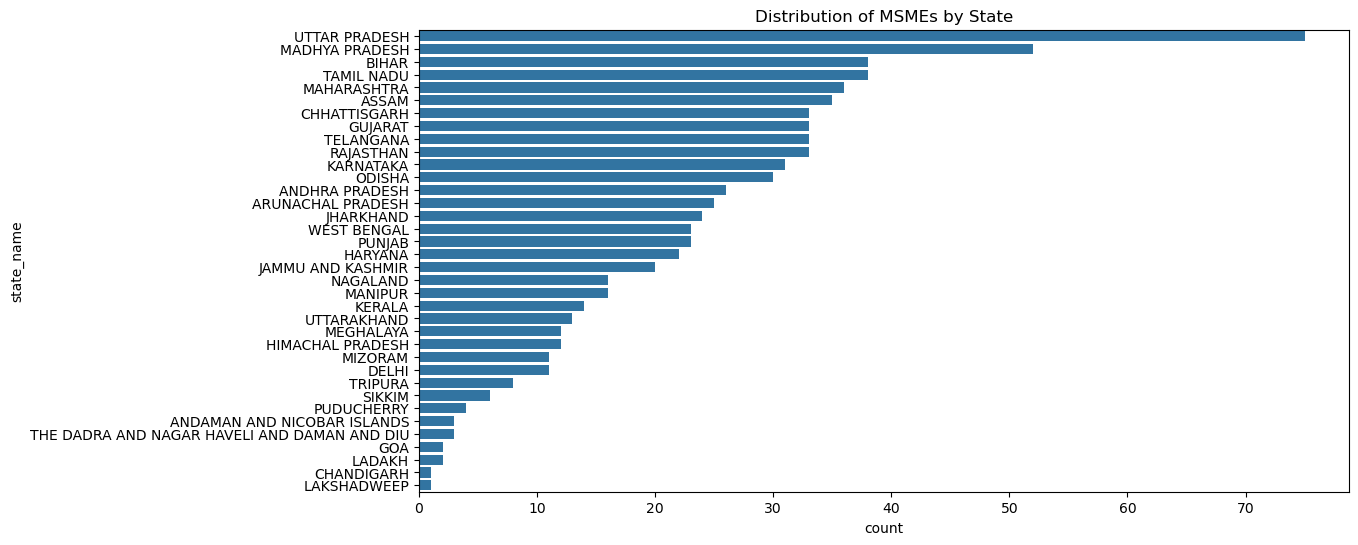

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(y='state_name', data=df, order=df['state_name'].value_counts().index)
plt.title('Distribution of MSMEs by State')
plt.show()

### Plot MSME Business Size Distribution

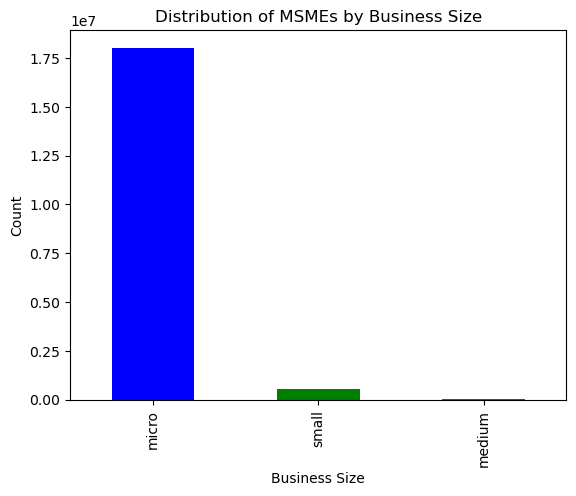

In [63]:
df[['micro', 'small', 'medium']].sum().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of MSMEs by Business Size')
plt.xlabel('Business Size')
plt.ylabel('Count')
plt.show()

# Segmenting users based on data

### Selecting Features for Clustering

In [64]:
df['total'] = df[['micro', 'small', 'medium']].sum(axis=1)
clustering_data = df[['state_name', 'total']].copy()

### Encode Categorical Data to encode the state_name column to numerical values.

In [65]:
from sklearn.preprocessing import LabelEncoder

clustering_data.loc[:, 'state_encoded'] = LabelEncoder().fit_transform(clustering_data['state_name'])
clustering_data = clustering_data[['state_encoded', 'total']]

### trying clustering data using K-Means.

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clustering_data['cluster'] = kmeans.fit_predict(clustering_data)

### Plot Visualising Clusters

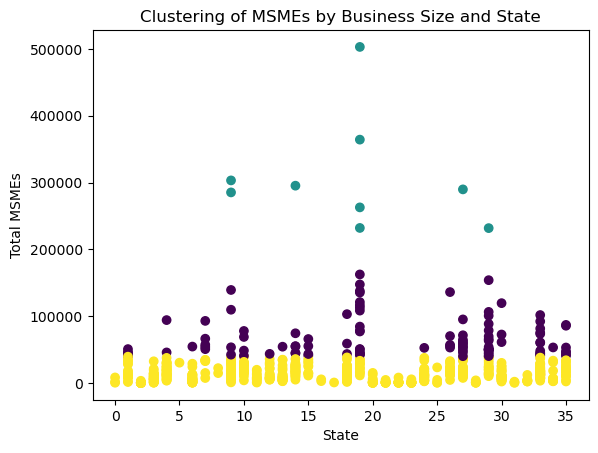

In [67]:
plt.scatter(clustering_data['state_encoded'], clustering_data['total'], c=clustering_data['cluster'], cmap='viridis')
plt.title('Clustering of MSMEs by Business Size and State')
plt.xlabel('State')
plt.ylabel('Total MSMEs')
plt.show()

The clustering visualization demonstrates how MSMEs are grouped by total business size across different states, providing a clearer understanding of regional trends in MSME distribution. Key insights include:

1.	Cluster Distribution: The three distinct clusters highlight varying levels of MSME density by state. For example, states with higher total MSMEs appear in one cluster (shown in yellow), suggesting that these regions may have a larger base of smaller businesses, while other clusters show lower density, possibly indicative of fewer but larger businesses.
2.	State-Wise Insights: The encoding of states as numerical values allows for state-level comparisons. States with higher numbers of MSMEs stand out, indicating potential focus areas for product offerings tailored to the needs of dense MSME populations.
3.	Tailored Strategies for High-Density Regions: States with high MSME counts might benefit from additional support resources or financing options to help businesses scale. Meanwhile, regions with fewer MSMEs could benefit from outreach initiatives aimed at fostering new business growth.

This clustering prototype can help the platform tailor its features and services based on regional demand, laying the groundwork for more personalized and region-specific support strategies for MSMEs.

# Detailed Analysis of MSME Distribution by Business Size

Comparing the number of micro, small, and medium businesses within each state. This could help identify which states have a higher density of smaller businesses and which have more medium-sized enterprises, giving insight into regional business ecosystems.

### Visualization of Business Size Proportions

Creating pie charts and bar charts for each state that show the proportion of micro, small, and medium businesses. This would make it easy to see the distribution of business sizes within each state.

In [69]:
# Add a total count column for each state for visualization purposes
df['total'] = df[['micro', 'small', 'medium']].sum(axis=1)

# Summing business sizes by state
state_business_distribution = df.groupby('state_name')[['micro', 'small', 'medium']].sum()


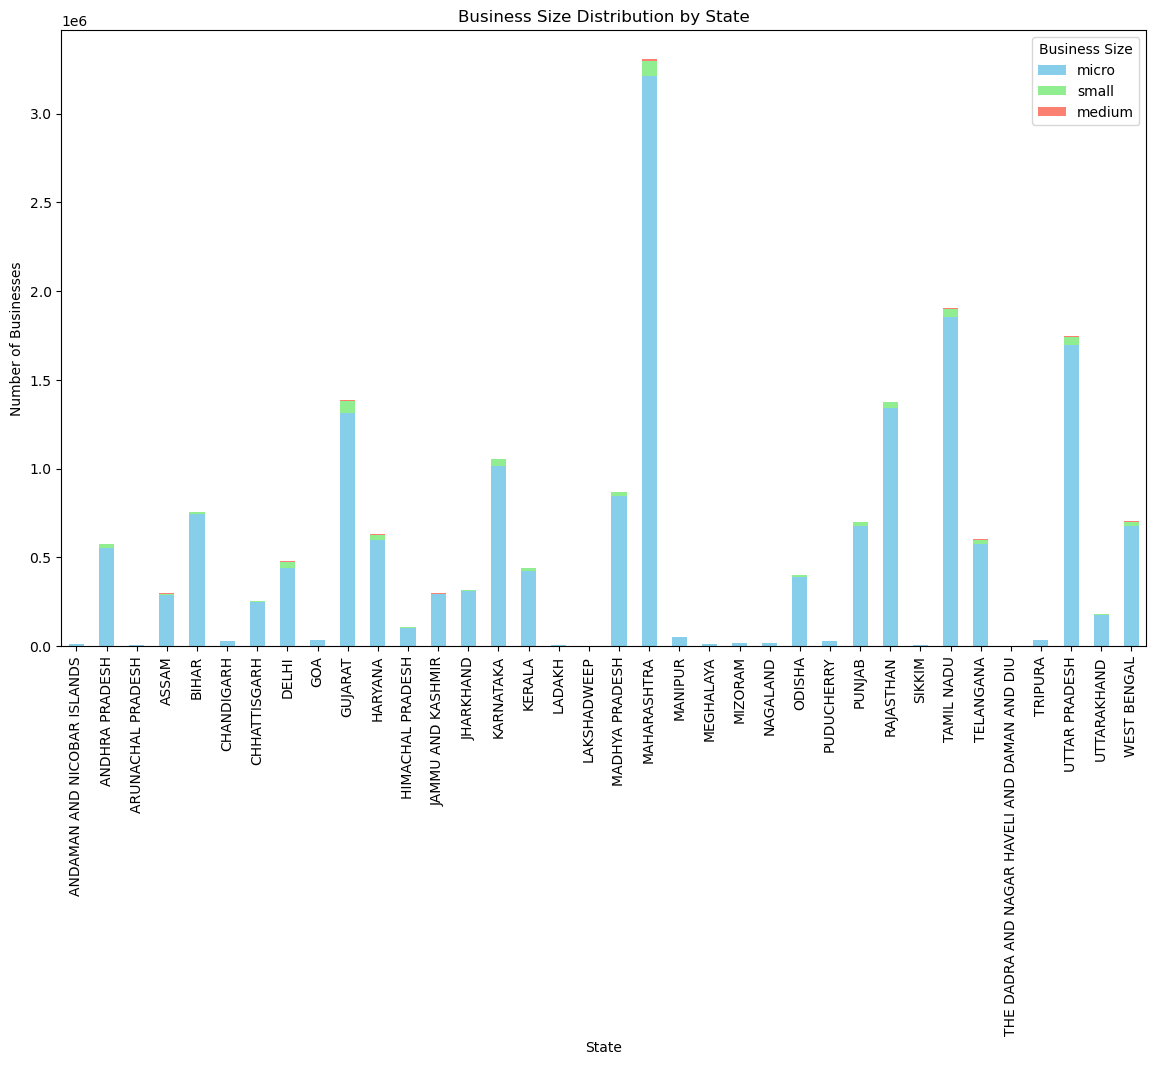

In [ ]:
# Plotting Business Size Comparison by State (Bar Chart)
plt.figure(figsize=(14, 8))
state_business_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'], ax=plt.gca())
plt.title('Business Size Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Businesses')
plt.legend(title='Business Size')
plt.xticks(rotation=90)
plt.show()

## This visualizes the count of each business size (micro, small, medium) for each state, allowing us to easily compare the densities across states.

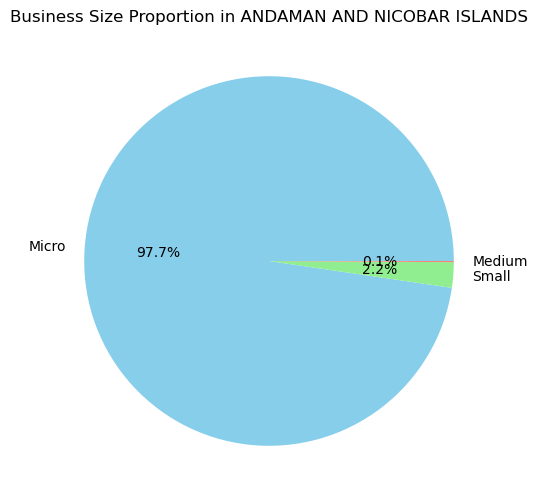

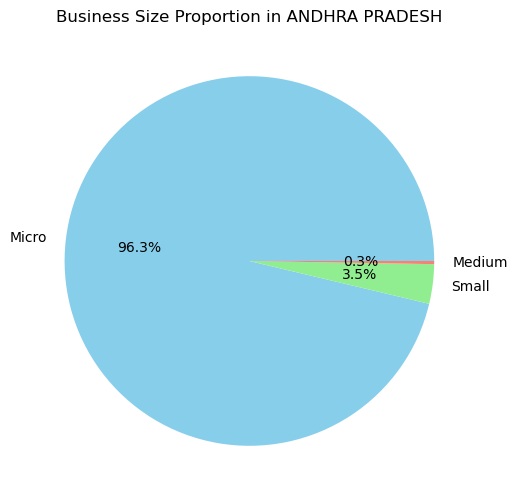

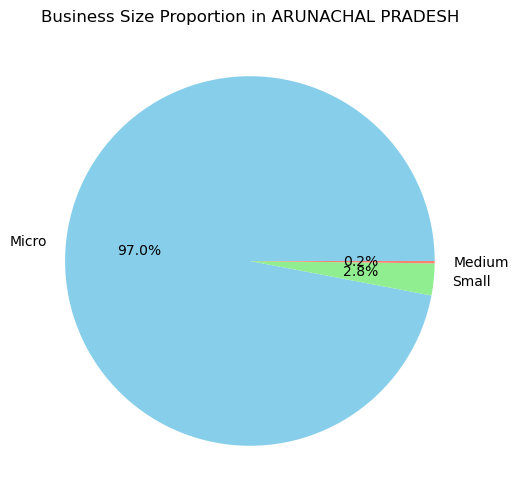

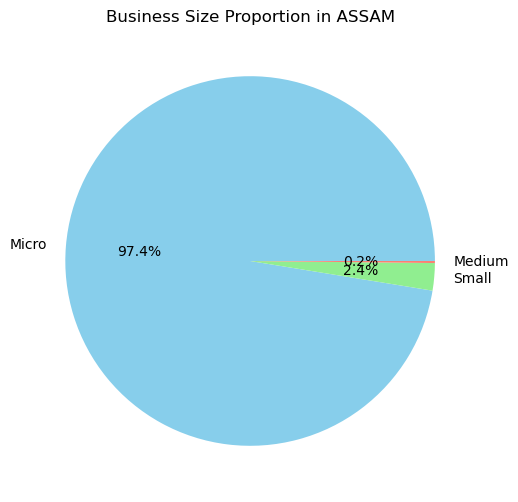

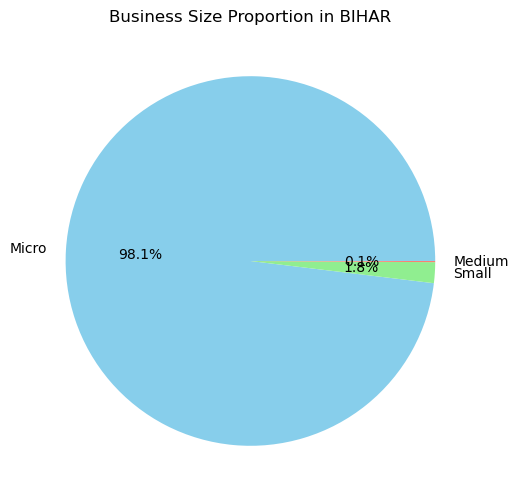

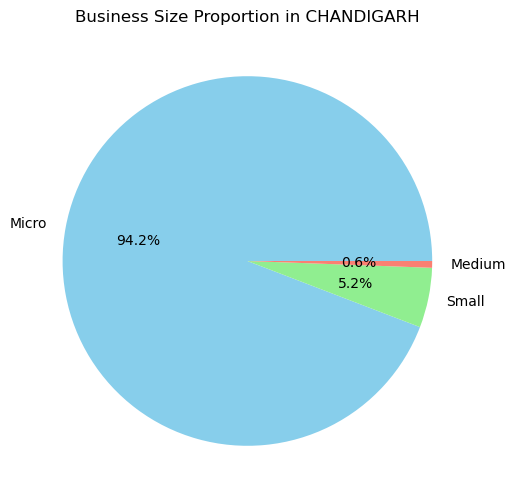

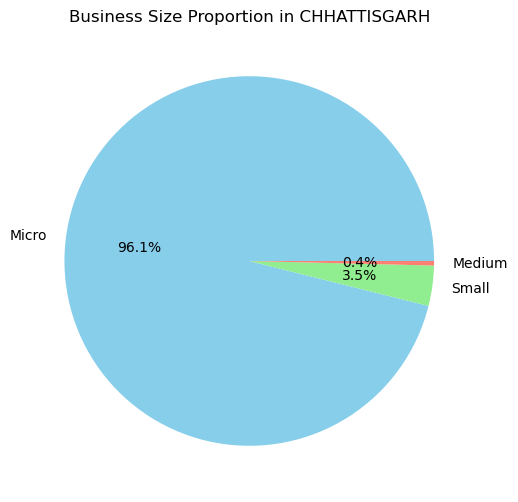

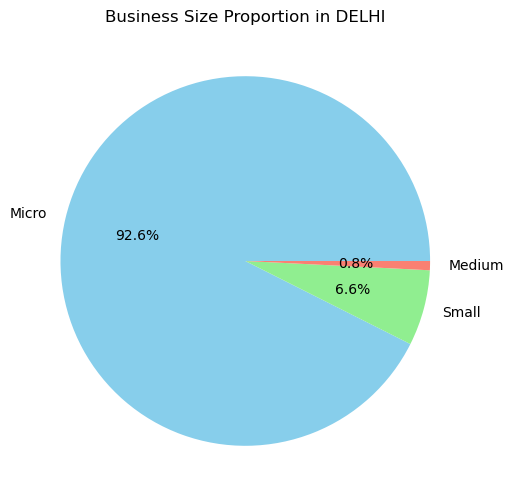

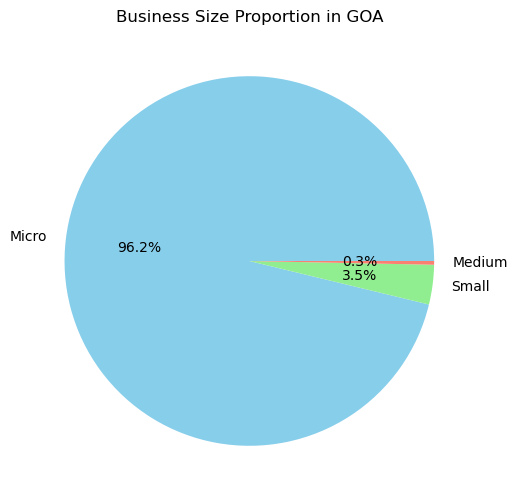

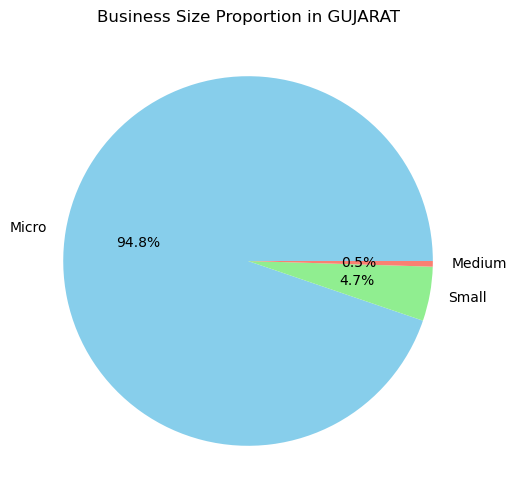

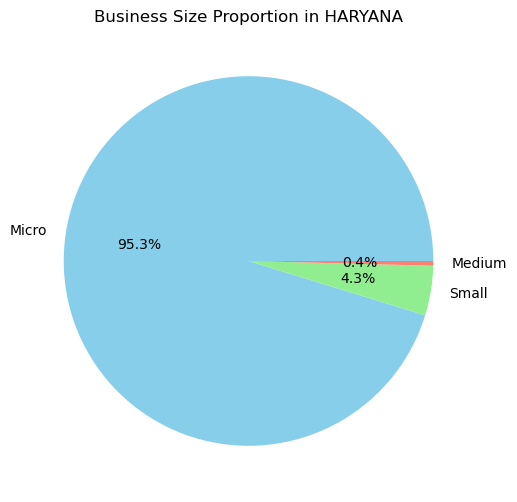

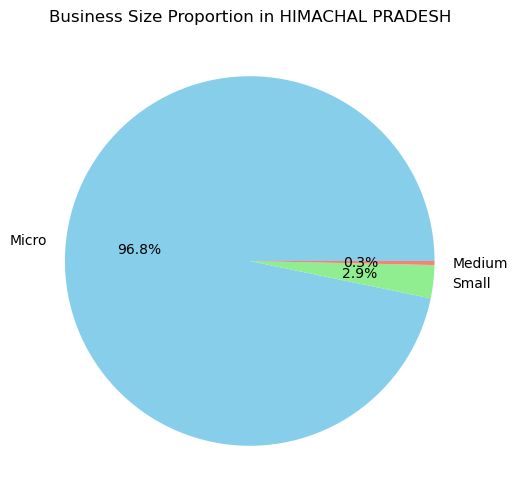

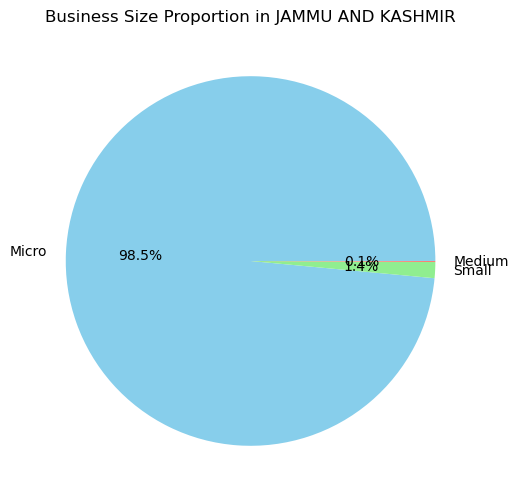

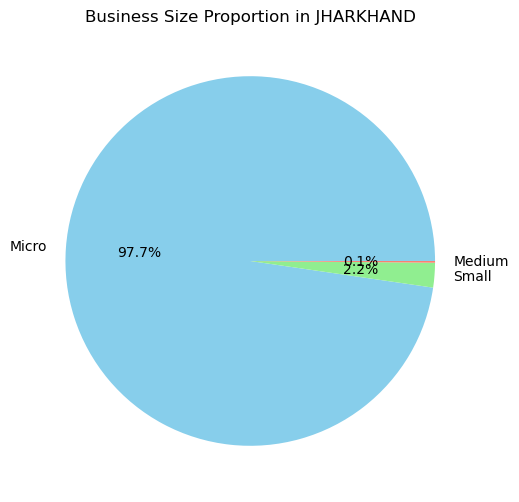

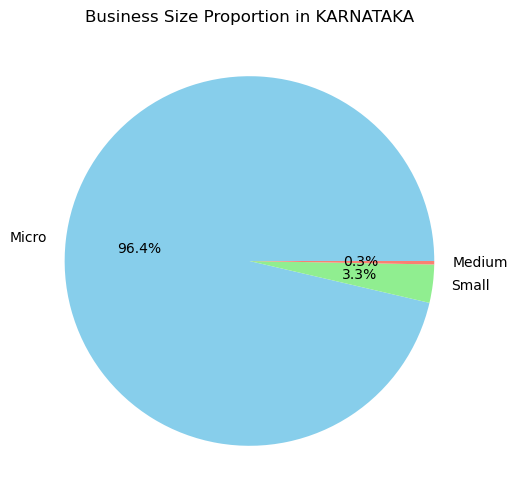

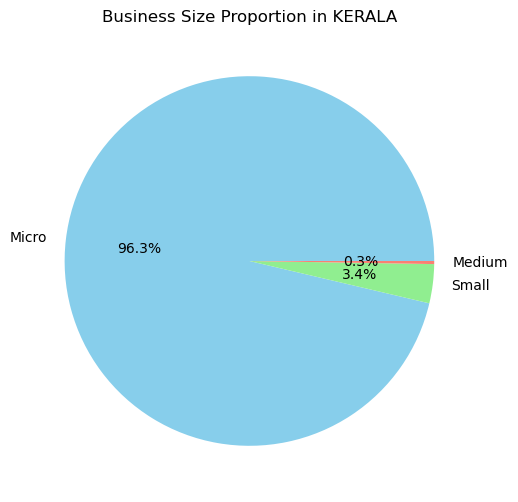

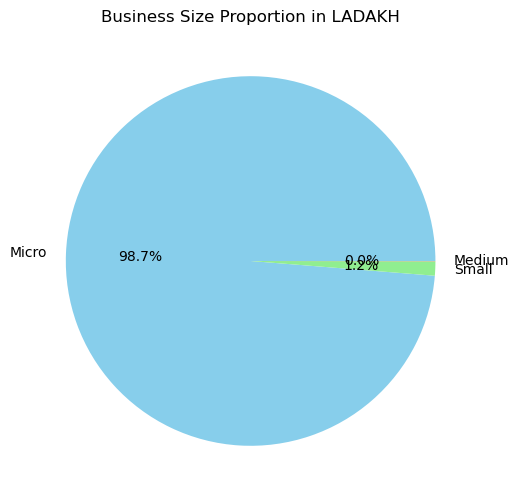

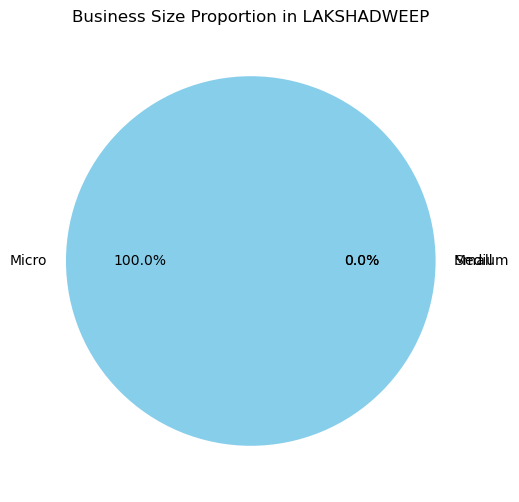

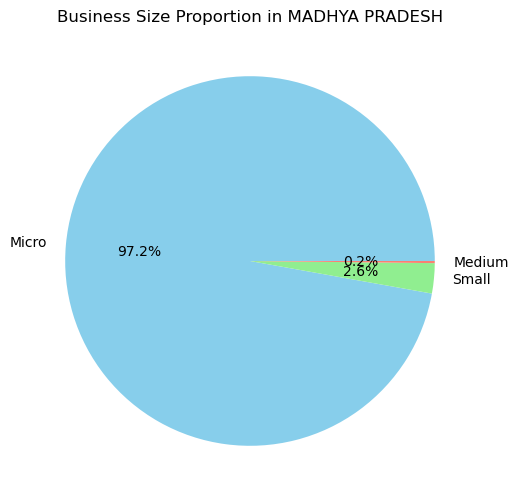

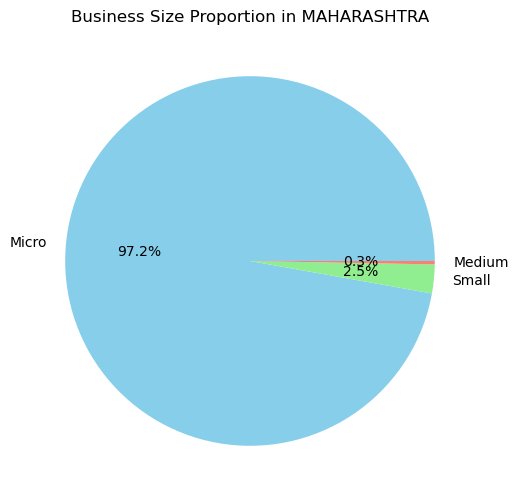

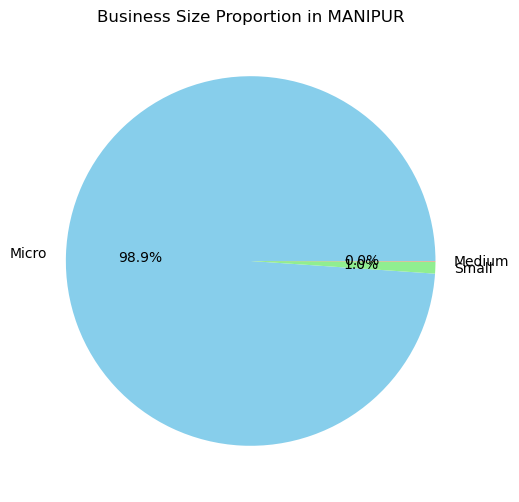

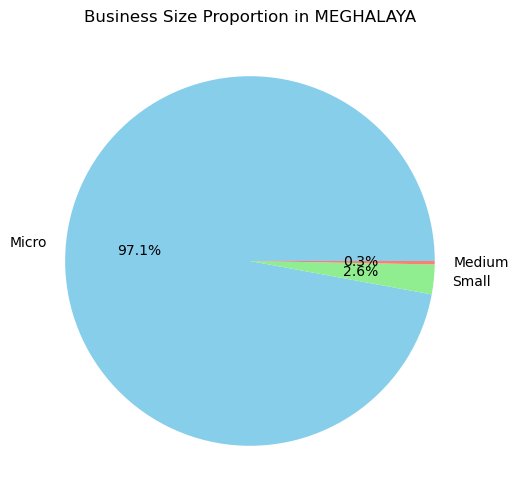

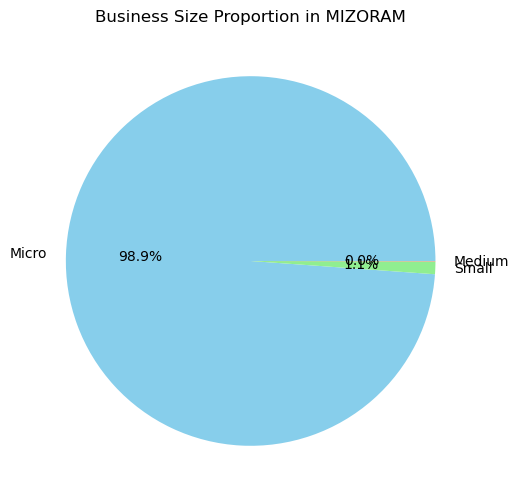

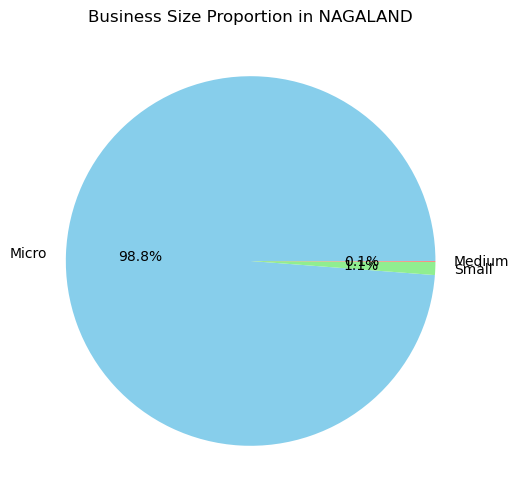

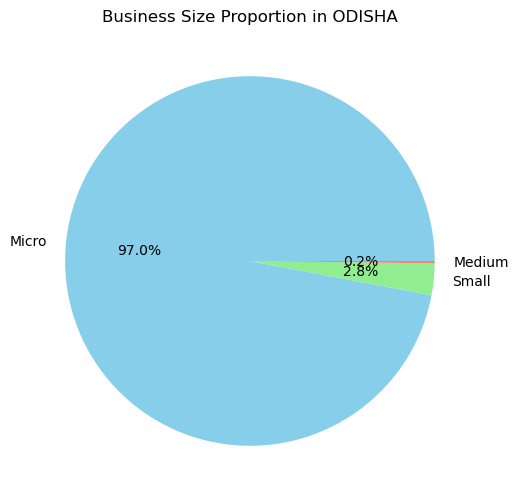

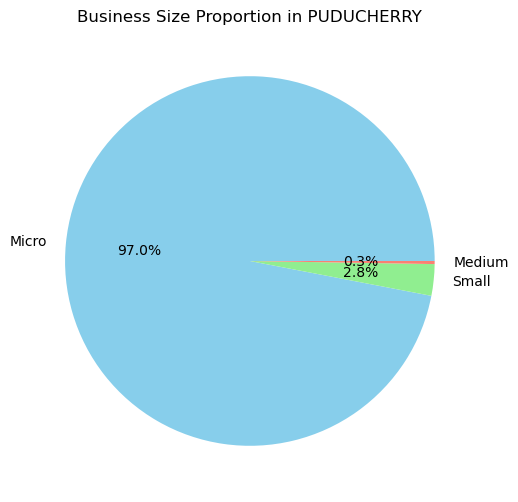

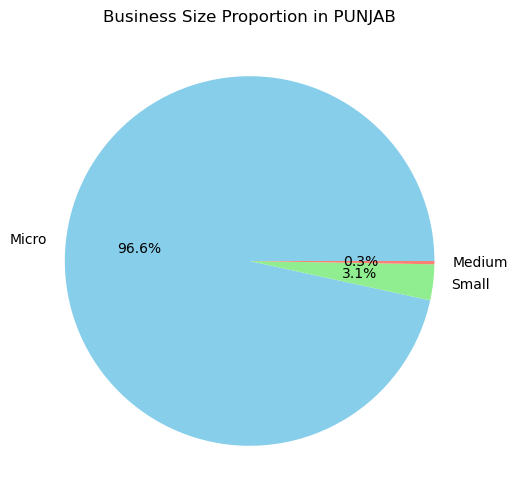

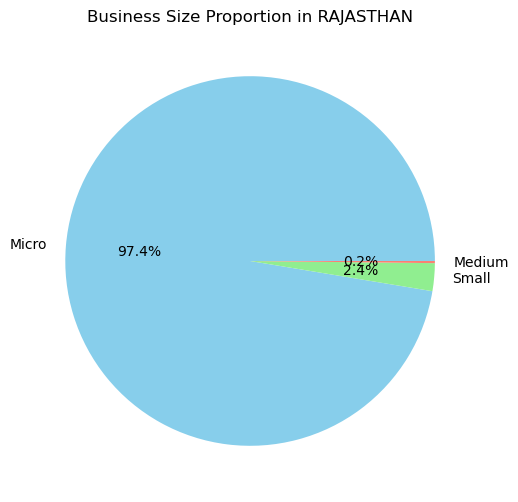

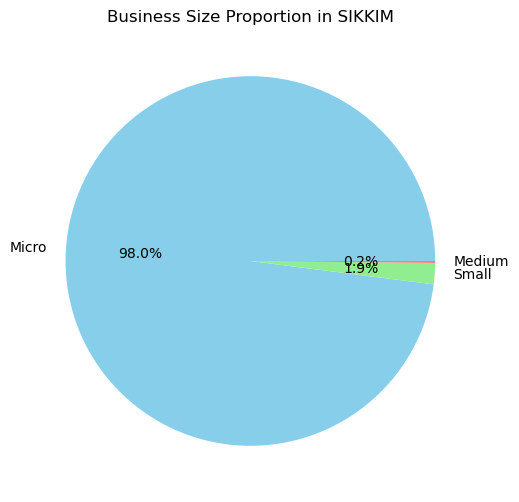

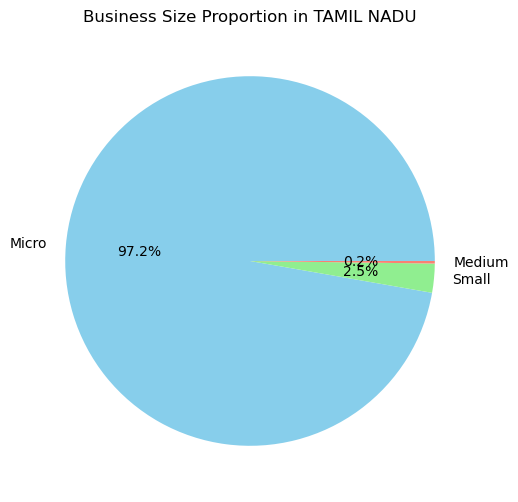

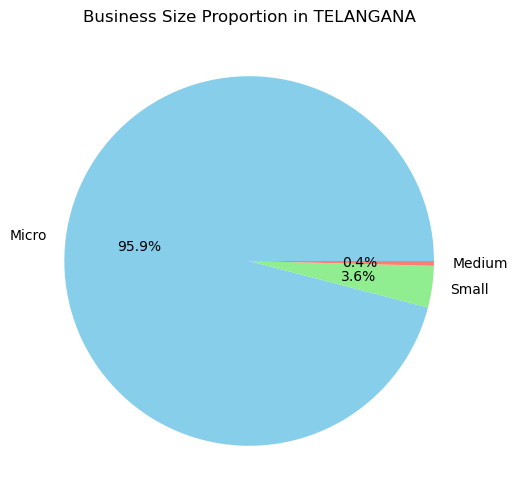

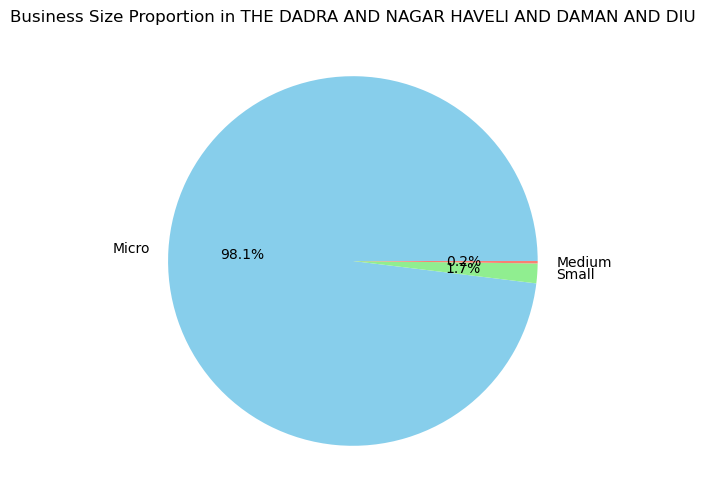

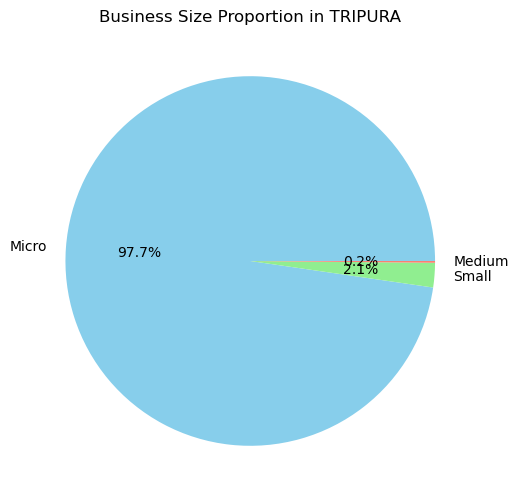

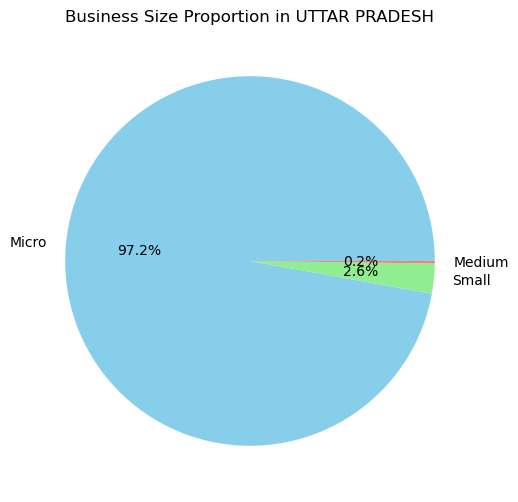

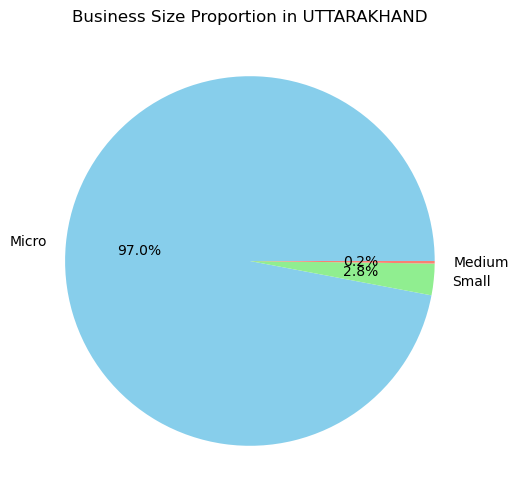

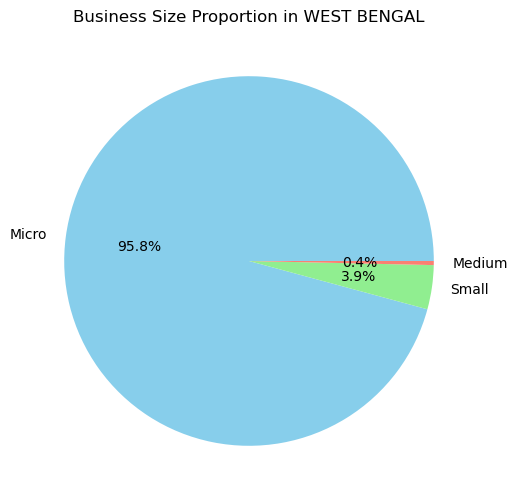

In [ ]:
# Visualizing Business Size Proportions for Each State (Pie Chart)
for state in state_business_distribution.index:
    business_sizes = state_business_distribution.loc[state]
    plt.figure(figsize=(6, 6))
    plt.pie(business_sizes, labels=['Micro', 'Small', 'Medium'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
    plt.title(f'Business Size Proportion in {state}')
    plt.show()

## For each state, a pie chart illustrates the proportion of micro, small, and medium businesses, giving insights into the business distribution within each state.

# Regional Clustering and Insights Beyond State Boundaries

Using KMeans and another clustering technique (Hierarchical Clustering), analyze and visualize which states or regions have similar distributions of MSMEs across business sizes. 

### Regional MSME Growth Potential: 

Calculate the ratio of medium to micro-businesses in each state. States with a lower ratio might represent regions with potential for growth or for targeted development programs.

In [72]:
from sklearn.preprocessing import StandardScaler

# Calculate total business count by state for micro, small, and medium
state_business_counts = df.groupby('state_name')[['micro', 'small', 'medium']].sum()

# 1. Inter-state MSME Distribution Clusters (using KMeans)
# Standardize data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_business_counts)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters based on preferred grouping
state_business_counts['cluster'] = kmeans.fit_predict(scaled_data)

## KMeans Clustering: The clustering groups states with similar distributions of micro, small, and medium businesses. For instance, states with high micro-business counts but low medium-business counts may fall into a similar cluster, providing insights for targeted growth strategies.

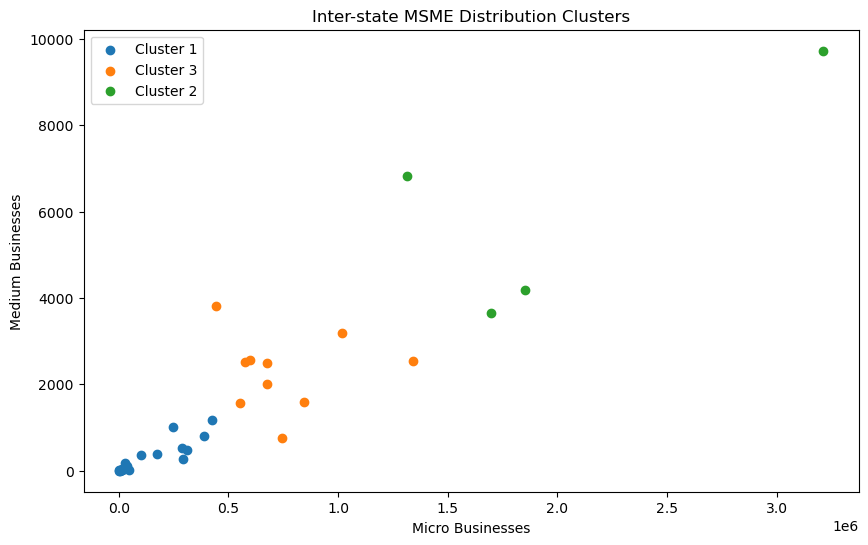

In [73]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
for cluster in state_business_counts['cluster'].unique():
    cluster_data = state_business_counts[state_business_counts['cluster'] == cluster]
    plt.scatter(cluster_data['micro'], cluster_data['medium'], label=f'Cluster {cluster + 1}')

plt.title('Inter-state MSME Distribution Clusters')
plt.xlabel('Micro Businesses')
plt.ylabel('Medium Businesses')
plt.legend()
plt.show()

                                              growth_potential_ratio  cluster
state_name                                                                   
LAKSHADWEEP                                                 0.000000        0
LADAKH                                                      0.000250        0
MIZORAM                                                     0.000388        0
MANIPUR                                                     0.000454        0
NAGALAND                                                    0.000782        0
JAMMU AND KASHMIR                                           0.000907        0
BIHAR                                                       0.001015        2
ANDAMAN AND NICOBAR ISLANDS                                 0.001015        0
JHARKHAND                                                   0.001534        0
TRIPURA                                                     0.001584        0
SIKKIM                                                      0.00

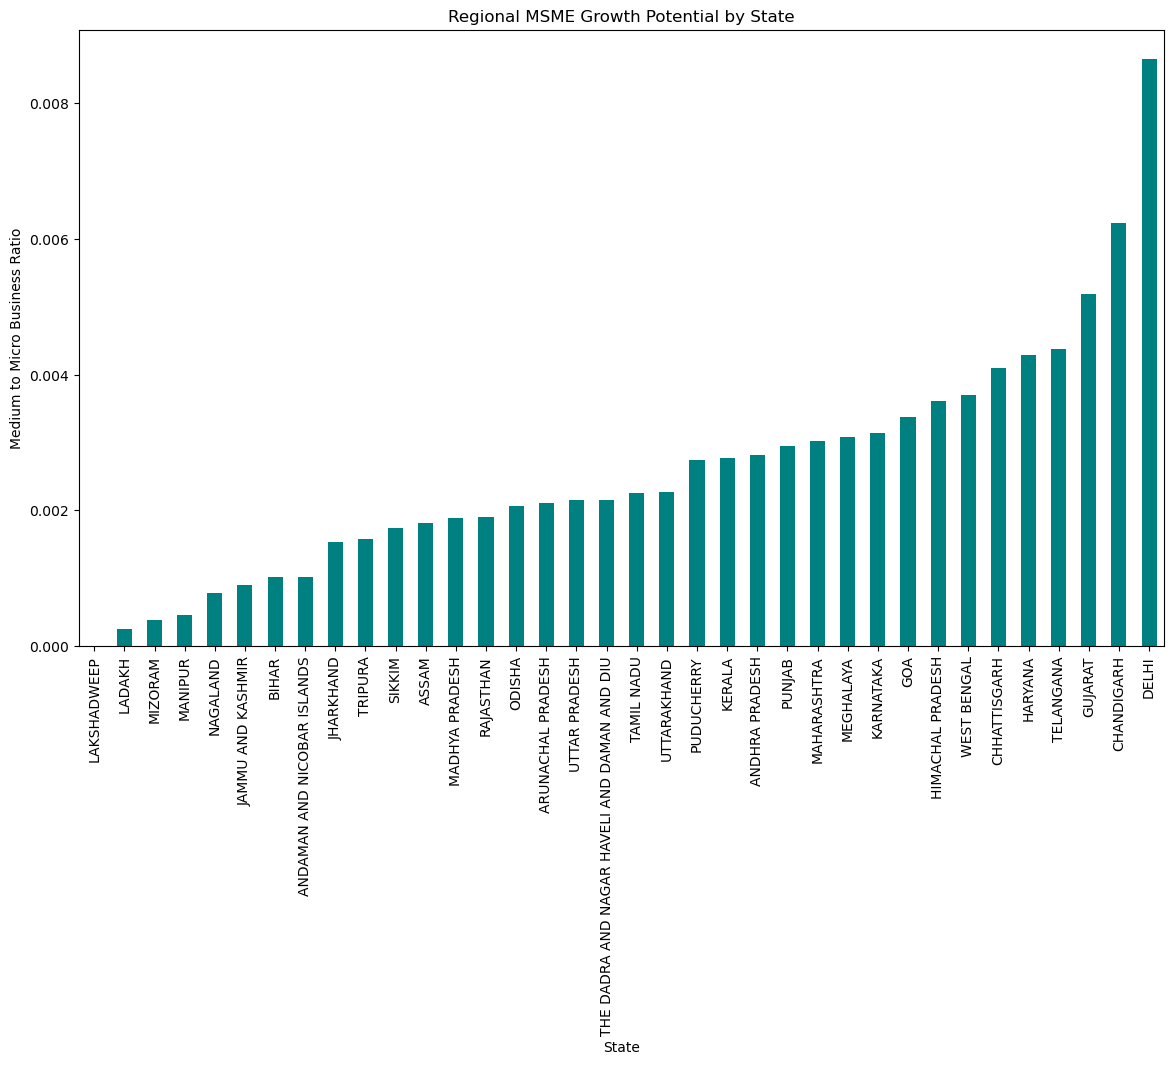

In [ ]:
# 2. Regional MSME Growth Potential: Ratio of Medium to Micro Businesses
state_business_counts['growth_potential_ratio'] = state_business_counts['medium'] / state_business_counts['micro']

# Sort and display states by growth potential ratio (low ratio indicates higher growth potential)
sorted_growth_potential = state_business_counts.sort_values(by='growth_potential_ratio')
print(sorted_growth_potential[['growth_potential_ratio', 'cluster']])

# Visualization: Bar plot for growth potential ratio
plt.figure(figsize=(14, 8))
sorted_growth_potential['growth_potential_ratio'].plot(kind='bar', color='teal')
plt.title('Regional MSME Growth Potential by State')
plt.xlabel('State')
plt.ylabel('Medium to Micro Business Ratio')
plt.show()

## Growth Potential Ratio: The ratio of medium to micro-businesses serves as an indicator of regional growth potential. States with a lower ratio (meaning more micro-businesses relative to medium-sized ones) could represent areas with untapped growth potential, making them suitable for development initiatives.

# Hierarchical Clustering: 
The dendrogram visualizes how states cluster together based on business size distributions. By setting a distance threshold, we assign each state to a cluster.

In [76]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Aggregating MSME counts per state
state_business_counts = df.groupby('state_name')[['micro', 'small', 'medium']].sum()

# Calculate the ratio of medium to micro businesses for growth potential analysis
state_business_counts['medium_micro_ratio'] = state_business_counts['medium'] / (state_business_counts['micro'] + 1)  # Adding 1 to avoid division by zero

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_business_counts[['micro', 'small', 'medium']])

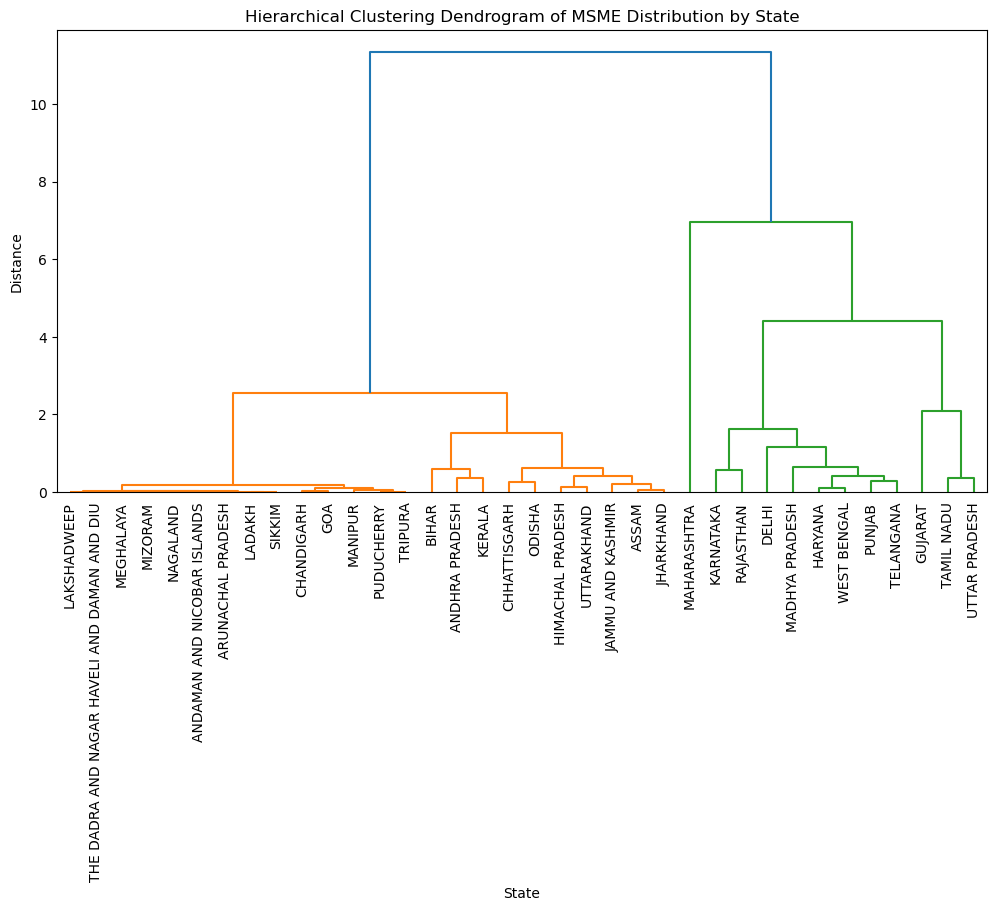

In [77]:
# Hierarchical Clustering using Ward’s method
Z = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=state_business_counts.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram of MSME Distribution by State')
plt.xlabel('State')
plt.ylabel('Distance')
plt.show()

## Visualizations:
•	Dendrogram: Displays the natural grouping of states by MSME distribution.

                                                micro    small  medium  \
state_name                                                               
ANDAMAN AND NICOBAR ISLANDS                      9850    224.0    10.0   
ANDHRA PRADESH                                 554967  19893.0  1566.0   
ARUNACHAL PRADESH                                8504    244.0    18.0   
ASSAM                                          289161   7089.0   526.0   
BIHAR                                          743781  13786.0   755.0   
CHANDIGARH                                      28556   1587.0   178.0   
CHHATTISGARH                                   245885   8986.0  1008.0   
DELHI                                          441770  31585.0  3821.0   
GOA                                             35461   1274.0   120.0   
GUJARAT                                       1313737  65736.0  6818.0   
HARYANA                                        599642  27319.0  2573.0   
HIMACHAL PRADESH                      

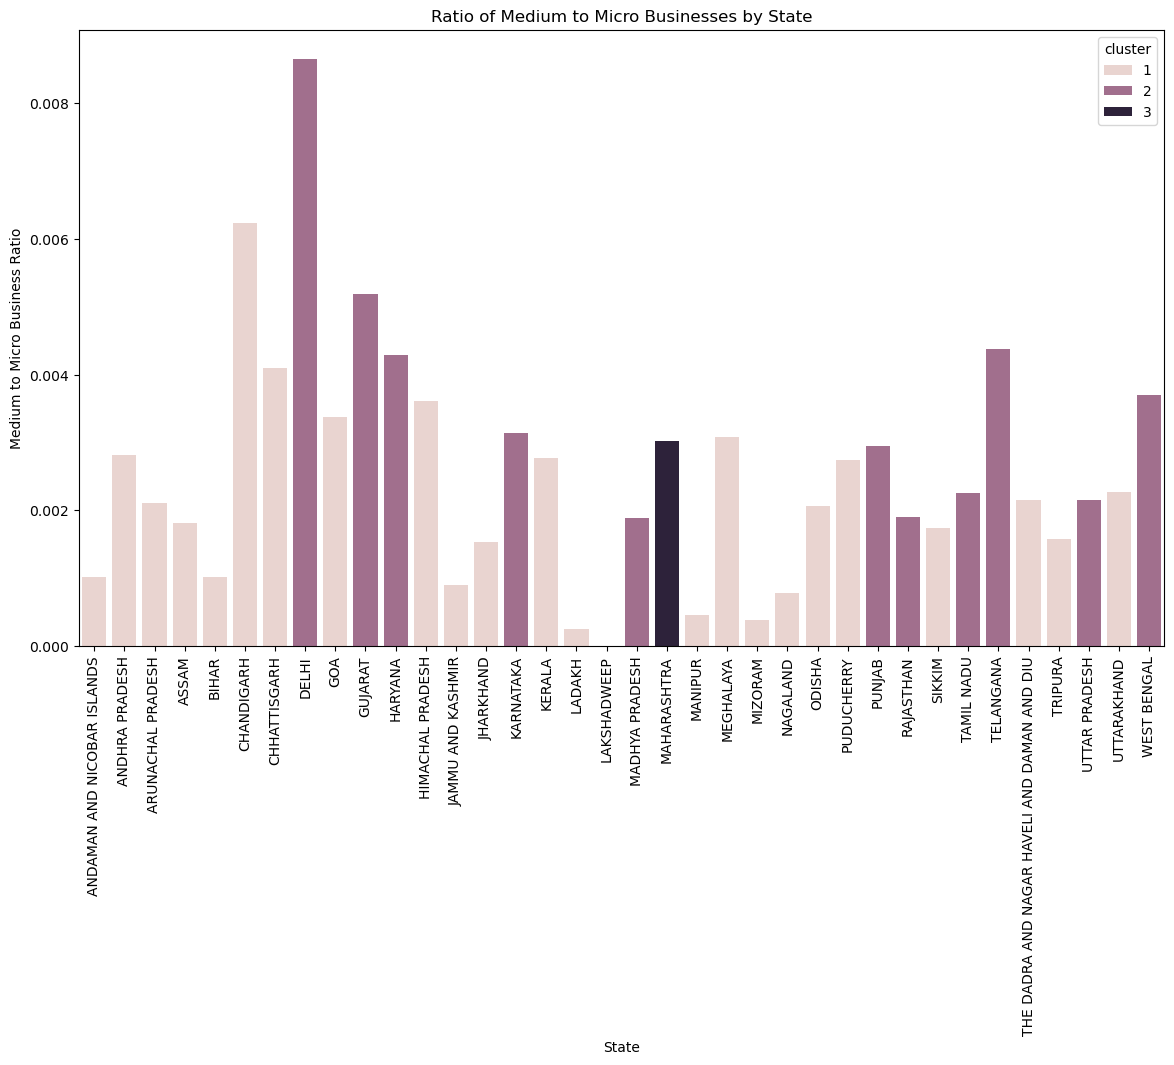

In [79]:
# Define clusters based on a distance threshold
clusters = fcluster(Z, t=6, criterion='distance')  # Adjust the threshold as needed
state_business_counts['cluster'] = clusters

# Display clusters and ratio analysis
print(state_business_counts[['micro', 'small', 'medium', 'medium_micro_ratio', 'cluster']])

# Visualization: Ratio of Medium to Micro Businesses by State
plt.figure(figsize=(14, 8))
sns.barplot(x=state_business_counts.index, y='medium_micro_ratio', data=state_business_counts, hue='cluster', dodge=False)
plt.title('Ratio of Medium to Micro Businesses by State')
plt.xlabel('State')
plt.ylabel('Medium to Micro Business Ratio')
plt.xticks(rotation=90)
plt.show()

## Medium to Micro Ratio: 

This ratio helps identify regions with a higher potential for business growth, as a low ratio may indicate an opportunity to support micro-businesses in scaling up to medium enterprises.

## Visualizations:
•	Bar Chart with Cluster Colors: Shows each state’s ratio of medium to micro businesses and highlights clusters for easy comparison.

# Cluster Comparison Across Business Sizes

Run clustering analysis separately for each business type (micro, small, and medium) and compare the results. This approach can show differences in the distribution of each business size across the country and identify regions that might benefit from different types of support or investment.

### Comparison of Cluster Characteristics:
Describe and analyze each cluster to understand what makes them unique, such as whether certain states consistently cluster together for specific business types.

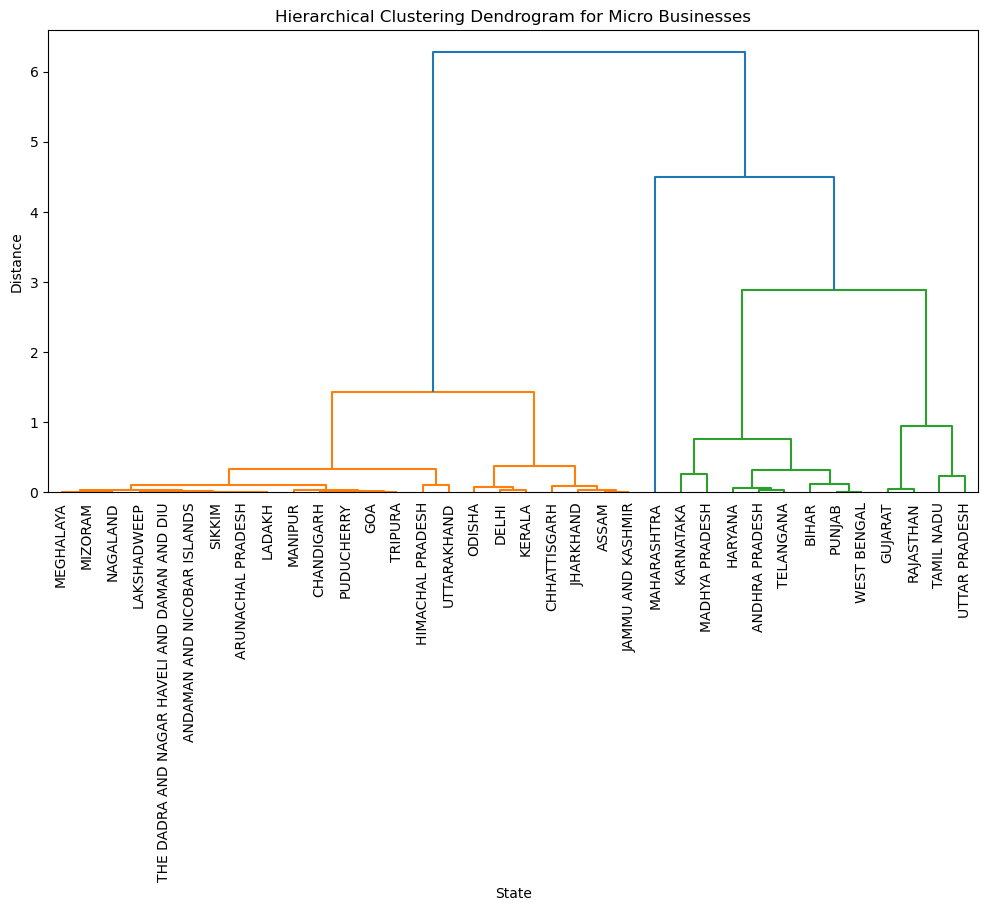


Micro Business Clusters:
                      micro
micro_cluster              
1              1.270453e+05
2              1.161862e+06


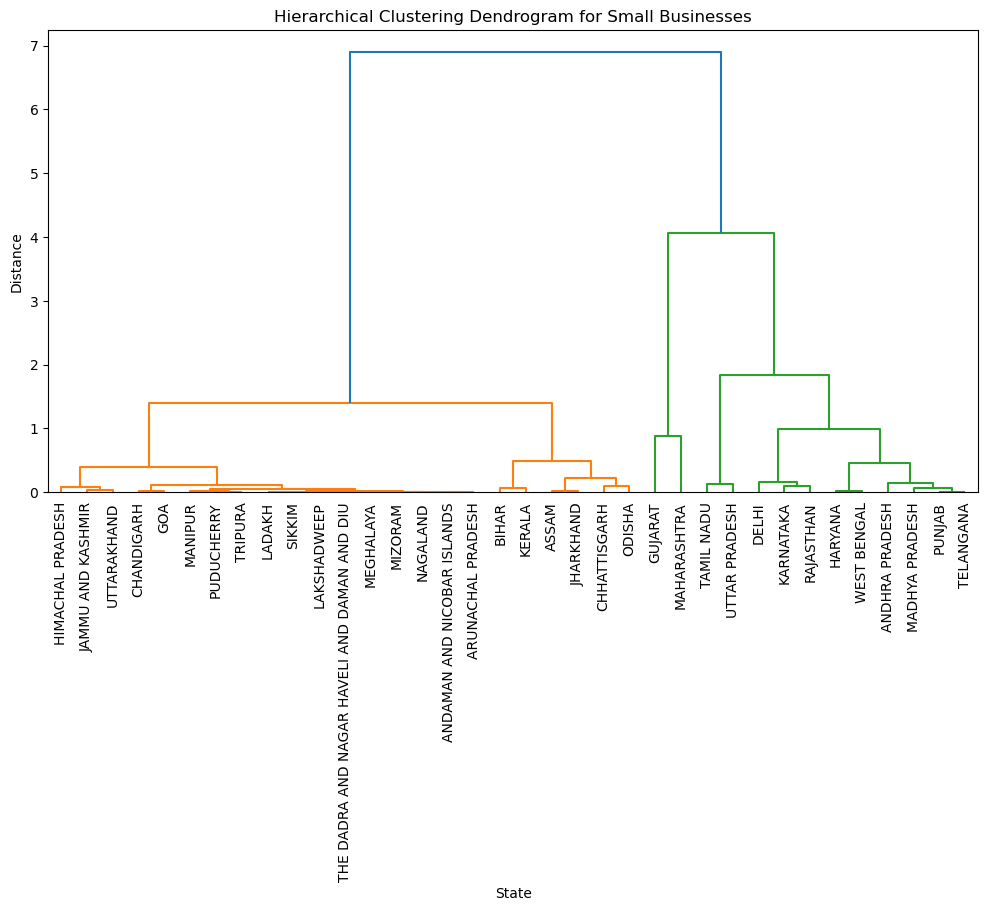


Small Business Clusters:
                      small
small_cluster              
1               3532.652174
2              37261.923077


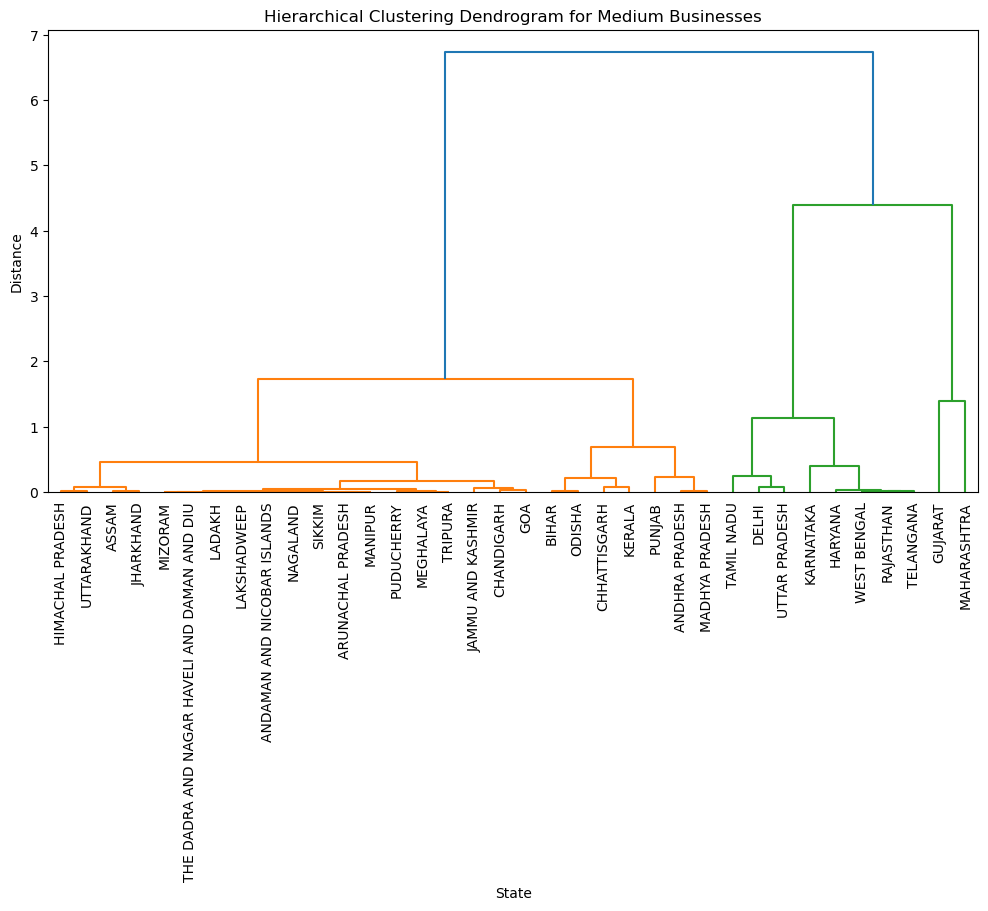


Medium Business Clusters:
                     medium
medium_cluster             
1                441.923077
2               4154.000000

Cluster Summary Across Business Types:
   micro_cluster  small_cluster  medium_cluster
1             23             23              26
2             13             13              10


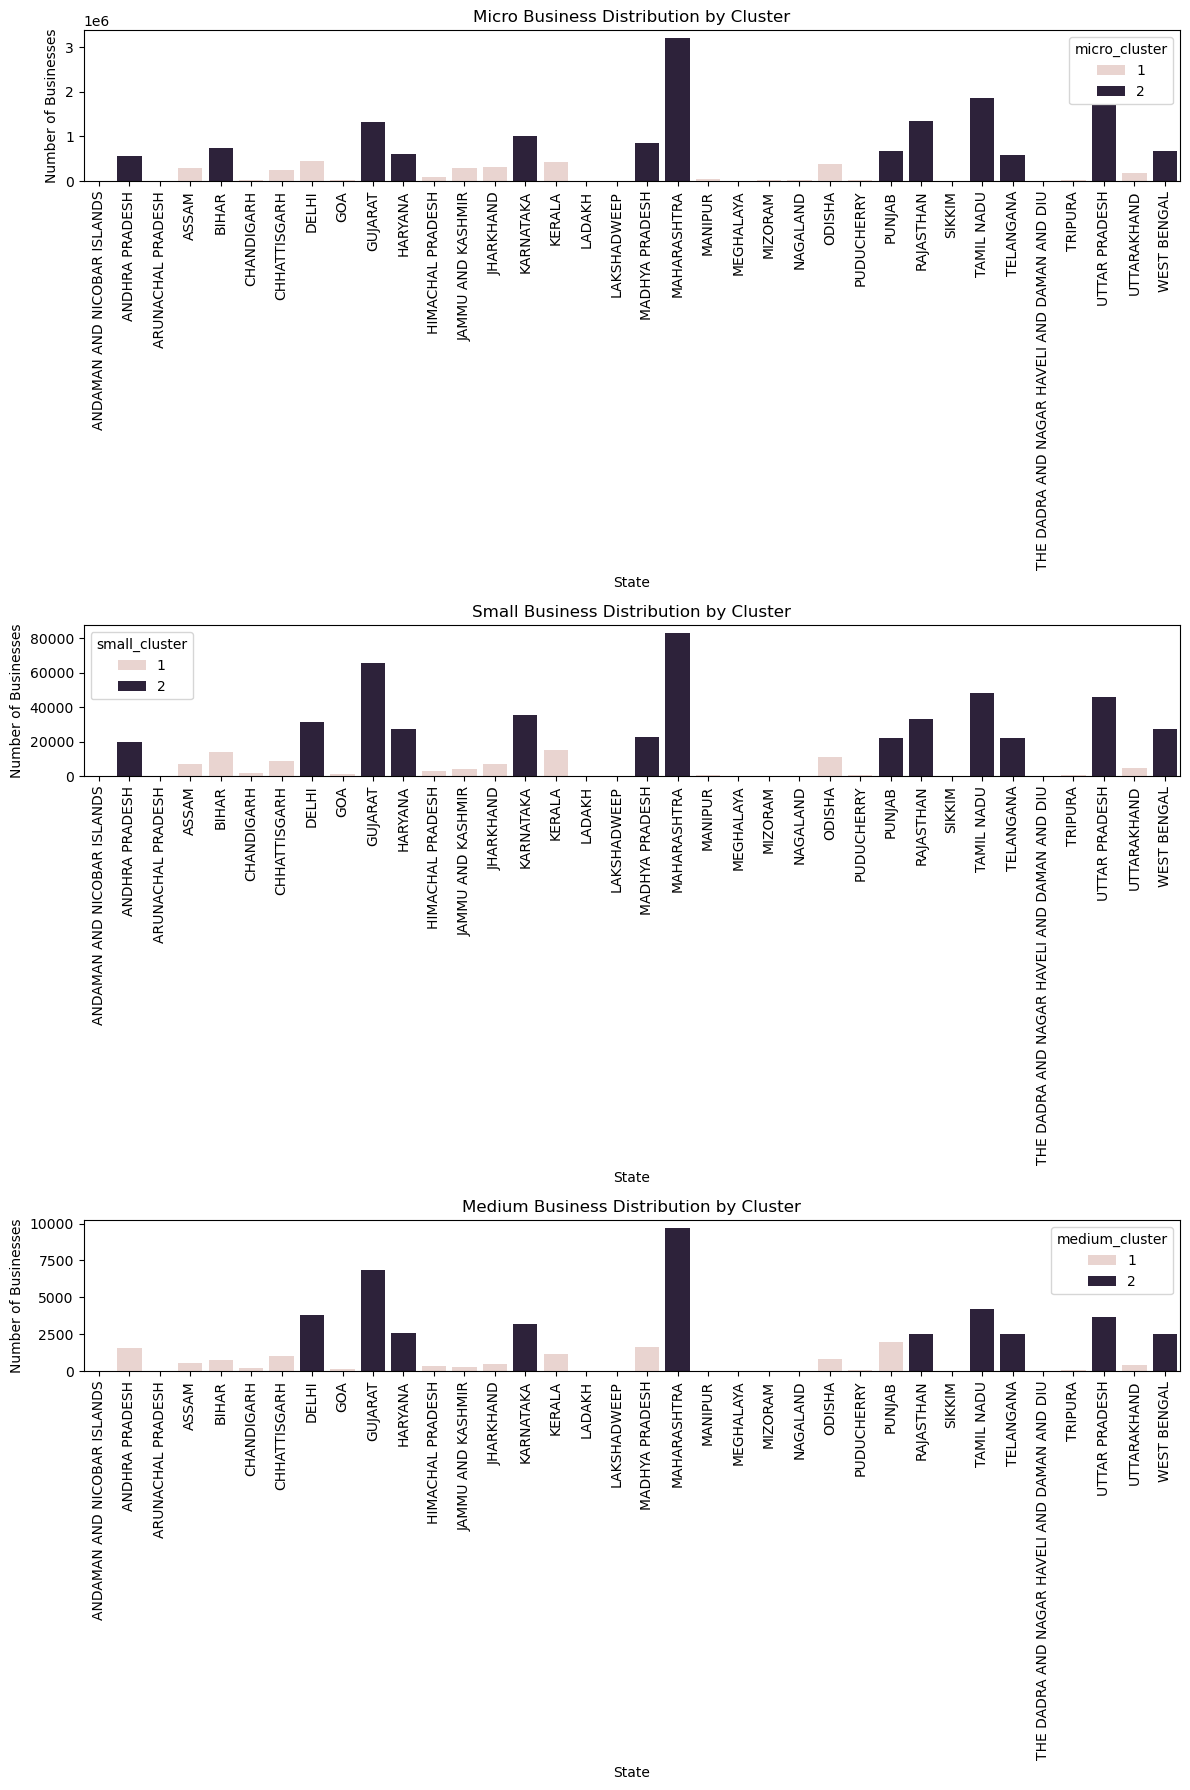

In [81]:
state_business_counts = df.groupby('state_name')[['micro', 'small', 'medium']].sum()

# Define a function to perform hierarchical clustering and visualize results
def cluster_by_business_type(data, business_type):
    # Standardize the data for clustering
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[[business_type]])

    # Hierarchical Clustering
    Z = linkage(scaled_data, method='ward')
    plt.figure(figsize=(12, 6))
    dendrogram(Z, labels=data.index, leaf_rotation=90, leaf_font_size=10)
    plt.title(f'Hierarchical Clustering Dendrogram for {business_type.capitalize()} Businesses')
    plt.xlabel('State')
    plt.ylabel('Distance')
    plt.show()

    # Define clusters based on a distance threshold
    clusters = fcluster(Z, t=5, criterion='distance')  # Adjust threshold as necessary
    data[f'{business_type}_cluster'] = clusters

    # Print cluster assignments
    print(f"\n{business_type.capitalize()} Business Clusters:")
    print(data[[business_type, f'{business_type}_cluster']].groupby(f'{business_type}_cluster').mean())

# Run clustering separately for each business type
for business_type in ['micro', 'small', 'medium']:
    cluster_by_business_type(state_business_counts, business_type)

# Summary comparison of clusters across business types
cluster_summary = state_business_counts[['micro_cluster', 'small_cluster', 'medium_cluster']].apply(pd.Series.value_counts)
print("\nCluster Summary Across Business Types:")
print(cluster_summary)

# Visualize Comparison of Cluster Characteristics
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
business_types = ['micro', 'small', 'medium']
for i, business_type in enumerate(business_types):
    sns.barplot(x=state_business_counts.index, y=business_type, hue=f'{business_type}_cluster', data=state_business_counts, ax=axes[i], dodge=False)
    axes[i].set_title(f'{business_type.capitalize()} Business Distribution by Cluster')
    axes[i].set_xlabel('State')
    axes[i].set_ylabel('Number of Businesses')
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

### Separate Clustering for Each Business Type:

•	We apply hierarchical clustering individually to each business type (micro, small, medium). Each clustering step groups states based on the density of that specific business size, capturing the distribution patterns unique to each.

•	The dendrograms for each business type help visualize the distinct groupings of states based on the count of that particular business type, allowing a comparison across clusters.

### Comparison of Cluster Characteristics:

•	The output summarizes each cluster’s average business count for the specific type, highlighting states with similar densities of micro, small, or medium businesses.

•	By reviewing the clusters formed for each business type, we can pinpoint states that frequently cluster together (e.g., states with a high density of micro businesses but low density in other types).

### Visualizing Cluster Characteristics:

•	Each plot provides a view of how states group within each business type, visually highlighting differences in business density and clustering patterns.

•	This helps stakeholders understand which states might need targeted interventions, like support for medium business growth or policies to boost micro and small enterprises.

This clustering approach enables nuanced insights into regional business characteristics, revealing areas that may benefit from specific types of support or investment.

# Dynamic Recommendations for State-Level Business Support

Identify states that are outliers—either having a very high or low count of specific business sizes—and suggest recommendations for possible government support or industry focus. For example, states with a low count of medium businesses might be prime targets for growth incentives.

### Targeted Policy Support Insights: 

Provide insight on which states may benefit from particular kinds of support (e.g., funding programs, training for small businesses) based on clustering results.

In [82]:
state_business_counts = df.groupby('state_name')[['micro', 'small', 'medium']].sum()

# Calculate z-scores to find outliers for each business type
from scipy.stats import zscore

state_business_counts['micro_zscore'] = zscore(state_business_counts['micro'])
state_business_counts['small_zscore'] = zscore(state_business_counts['small'])
state_business_counts['medium_zscore'] = zscore(state_business_counts['medium'])

# Define threshold for identifying outliers (e.g., states with z-score > 2 or < -2 are outliers)
outlier_threshold = 2

# Identify outliers for each business type
outliers = {
    'micro_high': state_business_counts[state_business_counts['micro_zscore'] > outlier_threshold],
    'micro_low': state_business_counts[state_business_counts['micro_zscore'] < -outlier_threshold],
    'small_high': state_business_counts[state_business_counts['small_zscore'] > outlier_threshold],
    'small_low': state_business_counts[state_business_counts['small_zscore'] < -outlier_threshold],
    'medium_high': state_business_counts[state_business_counts['medium_zscore'] > outlier_threshold],
    'medium_low': state_business_counts[state_business_counts['medium_zscore'] < -outlier_threshold],
}

# Print outliers and potential recommendations
for category, states in outliers.items():
    print(f"\nOutliers for {category}:\n", states)
    if "high" in category:
        print("Recommendation: Support advanced training programs or investment opportunities to sustain and manage growth.")
    elif "low" in category:
        print("Recommendation: Provide growth incentives, such as grants, loans, and educational programs to encourage development.")

# Example: Targeted policy support insights
def policy_support_insights(state_business_counts):
    insights = []
    for index, row in state_business_counts.iterrows():
        if row['medium'] < row['micro']:
            insights.append(f"{index} may benefit from growth incentives for medium businesses.")
        elif row['small'] > row['micro']:
            insights.append(f"{index} could benefit from support targeting micro-business development to balance the ecosystem.")
    return insights

# Generate and print policy support insights
insights = policy_support_insights(state_business_counts)
print("\nPolicy Support Insights:")
for insight in insights:
    print(insight)


Outliers for micro_high:
                micro    small  medium  micro_zscore  small_zscore  \
state_name                                                          
MAHARASHTRA  3212615  83293.0  9729.0      4.037671      3.391875   
TAMIL NADU   1852264  48271.0  4194.0      2.012272      1.634112   

             medium_zscore  
state_name                  
MAHARASHTRA       3.941501  
TAMIL NADU        1.299016  
Recommendation: Support advanced training programs or investment opportunities to sustain and manage growth.

Outliers for micro_low:
 Empty DataFrame
Columns: [micro, small, medium, micro_zscore, small_zscore, medium_zscore]
Index: []
Recommendation: Provide growth incentives, such as grants, loans, and educational programs to encourage development.

Outliers for small_high:
                micro    small  medium  micro_zscore  small_zscore  \
state_name                                                          
GUJARAT      1313737  65736.0  6818.0      1.210471      2.510

### Outlier Identification:
•	We calculate the z-scores for each business type (micro, small, medium) to standardize counts and make it easy to identify outliers.

•	States with z-scores above the threshold (>2 for high outliers and <-2 for low outliers) are flagged as having unusually high or low counts in a specific business type.

### Recommendations for Outliers:

•	For high outliers: Recommend advanced support, training, and investment opportunities to sustain growth and avoid saturation.

•	For low outliers: Recommend growth incentives like grants, loans, or training programs to stimulate development, especially for medium-sized businesses where density may be low.

### Targeted Policy Support Insights:

•	We create specific policy insights by comparing micro, small, and medium business counts in each state.

•	For example, if a state has significantly fewer medium businesses than micro businesses, this may signal a need for growth incentives aimed at medium enterprises.

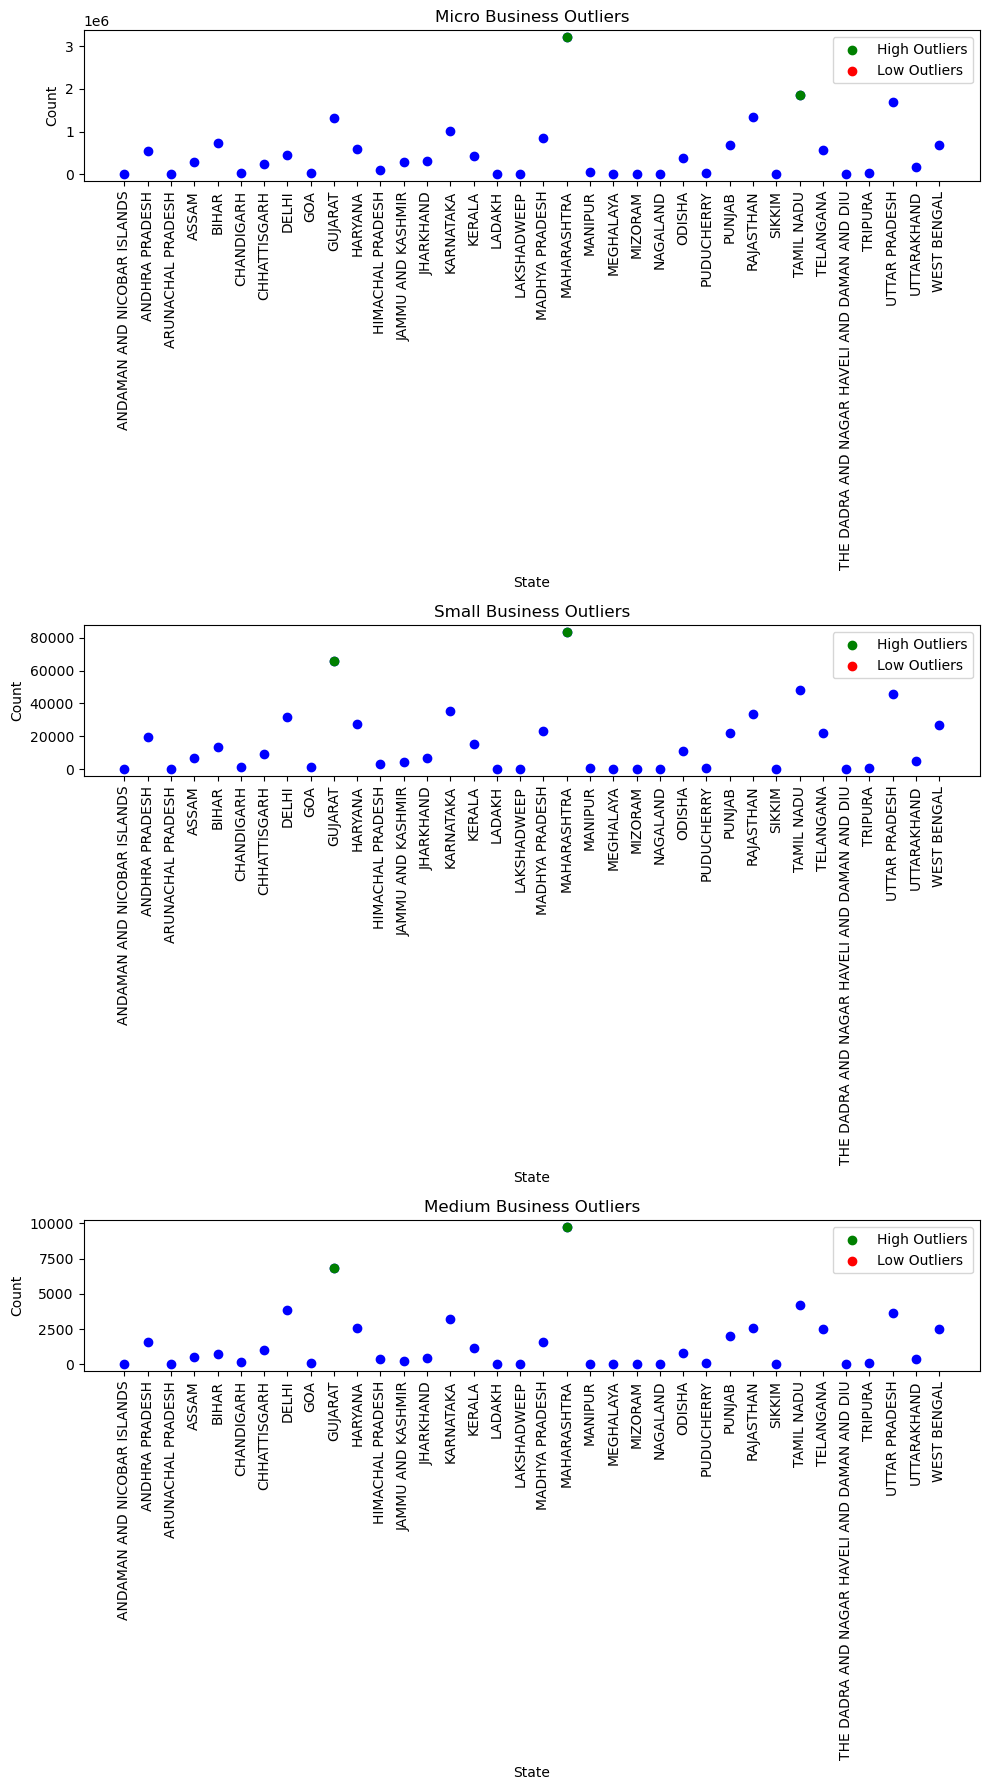

In [84]:
# Plotting outliers with vertical x-axis labels
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

business_types = ['micro', 'small', 'medium']
for i, business_type in enumerate(business_types):
    ax[i].scatter(state_business_counts.index, state_business_counts[business_type], color='blue')
    ax[i].scatter(outliers[f'{business_type}_high'].index, outliers[f'{business_type}_high'][business_type], color='green', label='High Outliers')
    ax[i].scatter(outliers[f'{business_type}_low'].index, outliers[f'{business_type}_low'][business_type], color='red', label='Low Outliers')
    ax[i].set_title(f'{business_type.capitalize()} Business Outliers')
    ax[i].set_xlabel('State')
    ax[i].set_ylabel('Count')
    ax[i].legend()
    ax[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout()
plt.show()

# Recommendation Model: Using a basic recommendation function

In [ ]:
# Creating a recommendation function based on the distribution of business sizes
def generate_recommendations(df):
    recommendations = []
    for index, row in df.iterrows():
        state = row['state_name']
        micro_count = row['micro']
        small_count = row['small']
        medium_count = row['medium']

        if micro_count > small_count and medium_count < small_count:
            recommendations.append((state, "Recommend Growth and Scaling Programs"))
        elif micro_count < 1000 and small_count < 500 and medium_count < 100:
            recommendations.append((state, "Recommend Foundational Support Programs"))
        elif medium_count > micro_count and medium_count > small_count:
            recommendations.append((state, "Recommend Advanced Business Development Programs"))
        else:
            recommendations.append((state, "Recommend Standard Support Programs"))
    
    return recommendations

# Applying the recommendation function to the data
recommendations = generate_recommendations(df)

# Display the recommendations
recommendations_df = pd.DataFrame(recommendations, columns=['State', 'Recommendation'])
recommendations_df.head(30)

,State,Recommendation
0,ANDHRA PRADESH,Recommend Standard Support Programs
1,ANDHRA PRADESH,Recommend Growth and Scaling Programs
2,ANDHRA PRADESH,Recommend Growth and Scaling Programs
3,ANDHRA PRADESH,Recommend Growth and Scaling Programs
4,ANDHRA PRADESH,Recommend Growth and Scaling Programs
5,ANDHRA PRADESH,Recommend Growth and Scaling Programs
6,ANDHRA PRADESH,Recommend Growth and Scaling Programs
7,ANDHRA PRADESH,Recommend Growth and Scaling Programs
8,ANDHRA PRADESH,Recommend Growth and Scaling Programs
9,ANDHRA PRADESH,Recommend Growth and Scaling Programs


## Business Development Programs for states with a high density of micro-businesses but few medium-sized businesses, as they may have potential for growth.

The function generate_recommendations goes through each state and assesses the counts of micro, small, and medium businesses.
Based on the thresholds we set, it assigns a type of support program recommendation.
Finally, we create a DataFrame to display the recommendations, which you can adjust further for different outputs.

## Lets add an extra rule for the function. Funding and Training Programs recommendations

This rule will identify states with lower counts of MSMEs across all business types and suggest foundational support programs, such as funding and training. 

In [ ]:
# Adding funding and training program recommendations for states with low MSME counts
def generate_recommendations_with_funding(df):
    recommendations = []
    for index, row in df.iterrows():
        state = row['state_name']
        micro_count = row['micro']
        small_count = row['small']
        medium_count = row['medium']

        # Check for states with low counts across all MSME sizes
        if micro_count < 500 and small_count < 200 and medium_count < 50:
            recommendations.append((state, "Recommend Funding and Training Programs"))
        elif micro_count > small_count and medium_count < small_count:
            recommendations.append((state, "Recommend Growth and Scaling Programs"))
        elif micro_count < 1000 and small_count < 500 and medium_count < 100:
            recommendations.append((state, "Recommend Foundational Support Programs"))
        elif medium_count > micro_count and medium_count > small_count:
            recommendations.append((state, "Recommend Advanced Business Development Programs"))
        else:
            recommendations.append((state, "Recommend Standard Support Programs"))

    return recommendations

# Apply the updated recommendation function to the data
recommendations_with_funding = generate_recommendations_with_funding(df)

# Display the updated recommendations
recommendations_with_funding_df = pd.DataFrame(recommendations_with_funding, columns=['State', 'Recommendation'])
recommendations_with_funding_df.head(50)

,State,Recommendation
0,ANDHRA PRADESH,Recommend Standard Support Programs
1,ANDHRA PRADESH,Recommend Growth and Scaling Programs
2,ANDHRA PRADESH,Recommend Growth and Scaling Programs
3,ANDHRA PRADESH,Recommend Growth and Scaling Programs
4,ANDHRA PRADESH,Recommend Growth and Scaling Programs
5,ANDHRA PRADESH,Recommend Growth and Scaling Programs
6,ANDHRA PRADESH,Recommend Growth and Scaling Programs
7,ANDHRA PRADESH,Recommend Growth and Scaling Programs
8,ANDHRA PRADESH,Recommend Growth and Scaling Programs
9,ANDHRA PRADESH,Recommend Growth and Scaling Programs
